<a href="https://colab.research.google.com/github/JoelFred20/oibsip_taskno3/blob/main/PricePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries:**

Start by importing the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**2. Load and Explore the Dataset:**

Load the dataset and explore it as mentioned earlier.

In [5]:
# Load the dataset
df = pd.read_csv('/content/car data.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        52

**3. Data Cleaning and Preprocessing:**

Clean the dataset by handling missing values and converting categorical variables.

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values if necessary
df.dropna(inplace=True)

# Feature Engineering (if needed)
# For example, create a new feature 'Age' based on the 'Year' column
df['Age'] = 2023 - df['Year']
df.drop('Year', axis=1, inplace=True)

# Convert categorical columns to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission', 'Owner'], drop_first=True)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


**4. Split Data:**

Split the dataset into training and testing sets.

In [ ]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**5.Model Selection and Hyperparameter Tuning (Random Forest):**

Use a Random Forest Regressor to predict car prices.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

**6. Evaluate the Model:**

Evaluate the performance of the model.

In [ ]:
y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.9240727958748709
R-squared: 0.9598849859850126


**7.Feature Importance:**

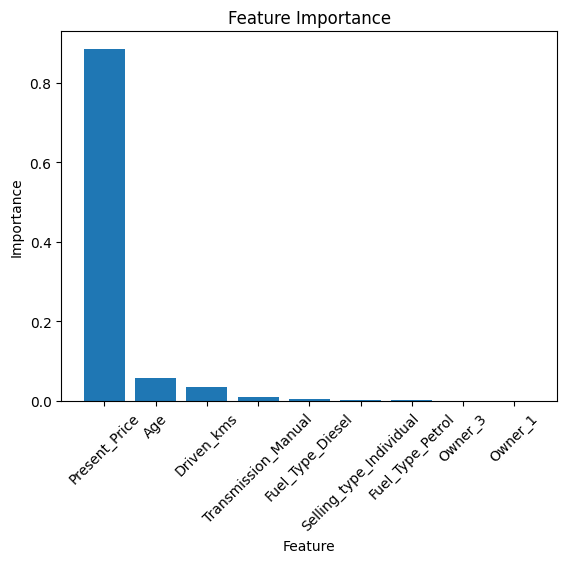

In [ ]:
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

sorted_idx = np.argsort(feature_importances)[::-1]

plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

**4. Data Visualization:**

Visualize how well the model predictions align with the actual selling prices.

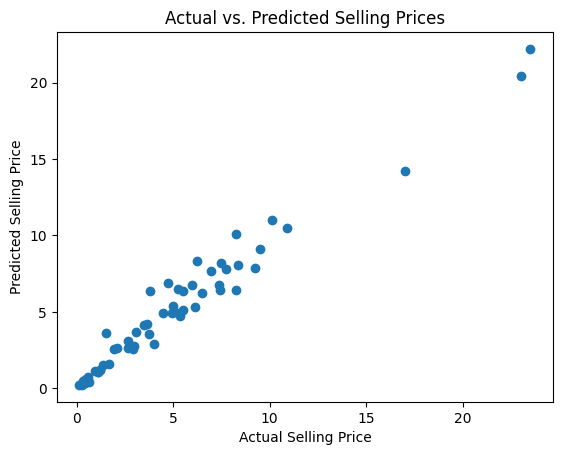

In [ ]:
# Visualize Actual vs. Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()